In [1]:
%run setup.py
import tqdm

/home/daniel/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
koi = pd.read_csv('../data/koi_dsct.csv')
toi = pd.read_csv('../data/toi.csv')

In [3]:
# koi.to_csv('../data/koi_dsct.csv')

In [4]:
from astropy.stats import BoxLeastSquares

def high_pass(t, y, width=3.):
    y_low = gaussian_filter(y, width)
    return y - y_low

def get_kepler_lc(kic_id):
    file = glob.glob(f'../data/lightcurves/Kepler/*{kic_id}.txt')[0]
    t, y = np.loadtxt(file, usecols=(0,1)).T
    return t, y
    
def preprocess_lc(t, y):
    y = high_pass(t, y)
    lc = lk.LightCurve(t, y).remove_outliers()
    return lc.time, lc.flux

In [5]:
ii = 3
t, y =preprocess_lc(*get_kepler_lc(koi.iloc[ii].kepid))
# t, y = preprocess_lc(lc.time, lc.flux)

koi_period = koi.iloc[ii].koi_period
koi_period_err = koi.iloc[ii].koi_period_err1
koi_eccen = koi.iloc[ii].koi_eccen

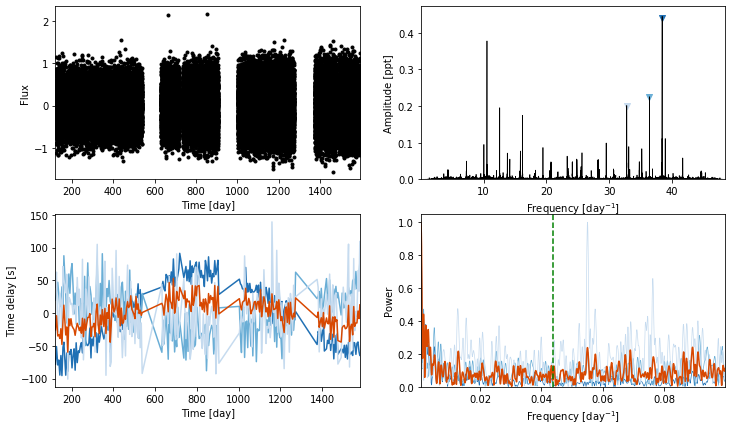

In [14]:
ms = Maelstrom(t, y, max_peaks=3, fmin=5, fmax=41)
ax = ms.first_look(segment_size=5);
ax[3].axvline(1./koi_period, c='g', linestyle='dashed')

plt.savefig(f"first look/{koi.iloc[ii].kepid}.png", dpi=300, bbox_inches='tight')

In [15]:
pmin = koi_period - 10
pmax = koi_period + 10
if pmin < 0:
    pmin = 0.1
periods = np.linspace(pmin, pmax, 100)
pg = ms.period_search()
res = pg.fit(periods)
# asinis.append(np.exp(res[0][0][1]['logasini']))

100%|██████████| 100/100 [02:52<00:00,  1.71s/it]


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f04d8db4eb8>,
      dtype=object)

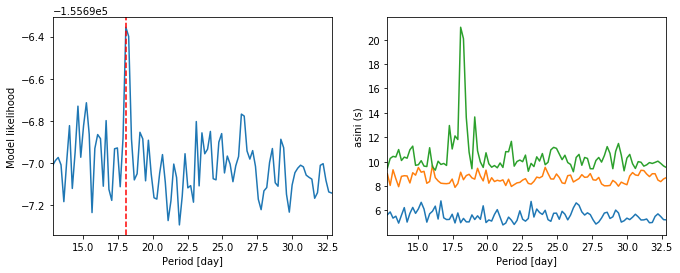

In [16]:
pg.diagnose()

In [17]:
koi_period

22.8245144

In [16]:
freqs.append(ms.freq)
asinis.append([np.exp(logasini) for logasini in [r[0][1]['logasini'] for r in res]])

[4.881281351242324, 8.464676384893275, 9.908222552404444]

In [17]:
[np.exp(logasini) for logasini in [r[0][1]['logasini'] for r in res]]

array([38.39793548, 36.3720579 , 32.76607507])

In [19]:
freqs = []
asinis = []
kics = []
for ii in range(len(koi)):
    t, y =preprocess_lc(*get_kepler_lc(koi.iloc[ii].kepid))
    # t, y = preprocess_lc(lc.time, lc.flux)

    koi_period = koi.iloc[ii].koi_period
    koi_period_err = koi.iloc[ii].koi_period_err1
    koi_eccen = koi.iloc[ii].koi_eccen

    ms = Maelstrom(t, y, max_peaks=5, fmin=5, fmax=41)
    
    kics.append(koi.iloc[ii].kepid)
    
    pg = ms.period_search()
    res = pg.fit([koi_period])
    
    freqs.append(ms.freq)
    asinis.append([np.exp(logasini) for logasini in [r[0][1]['logasini'] for r in res]])

100%|██████████| 1/1 [00:02<00:00,  2.69s/it]


In [40]:
results = pd.DataFrame({
    'kics': kics,
    'freqs': freqs,
    'asinis': asinis
})

In [41]:
results

,kics,freqs,asinis
0,3964109,"[6.809973439234463, 23.361563010285444, 6.8461...","[33.79318091091789, 32.28941317599031, 31.6212..."
1,9111849,"[5.084672385950283, 13.05318448310591, 9.07380...","[36.993821974159985, 33.94646987226625, 34.777..."
2,9845898,"[17.597276971603698, 26.11895021887403, 21.252...","[28.380804689276527, 61.58676420998954, 53.794..."
3,5202905,"[38.3979355109047, 36.37205798446713, 32.76607...","[4.881277764684413, 8.464675895854977, 9.90821..."
4,5202905,"[38.3979355109047, 36.37205798446713, 32.76607...","[5.7619357452894855, 8.896451511893469, 9.7040..."
5,6116172,"[11.240082150789652, 5.987241269218758, 5.4264...","[3.8511591830912923, 42.41213544328603, 23.847..."
6,6116172,"[11.240082150789652, 5.987241269218758, 5.4264...","[3.973782225505, 36.35184628614214, 68.0141086..."
7,6116172,"[11.240082150789652, 5.987241269218758, 5.4264...","[4.2494453988131085, 28.74030350356472, 36.292..."
8,11013201,"[33.41617611382547, 27.972374709873357, 40.143...","[6.761801685501373, 11.04002889102554, 12.3851..."
9,11013201,"[33.41617611382547, 27.972374709873357, 40.143...","[7.023358804286901, 10.57785538665758, 12.1220..."


In [48]:
results['asinis']

0     [33.79318091091789, 32.28941317599031, 31.6212...
1     [36.993821974159985, 33.94646987226625, 34.777...
2     [28.380804689276527, 61.58676420998954, 53.794...
3     [4.881277764684413, 8.464675895854977, 9.90821...
4     [5.7619357452894855, 8.896451511893469, 9.7040...
5     [3.8511591830912923, 42.41213544328603, 23.847...
6     [3.973782225505, 36.35184628614214, 68.0141086...
7     [4.2494453988131085, 28.74030350356472, 36.292...
8     [6.761801685501373, 11.04002889102554, 12.3851...
9     [7.023358804286901, 10.57785538665758, 12.1220...
10    [4.795808988848722, 30.699882238140784, 16.578...
11    [13.81095355940199, 23.472937613702978, 3.4297...
12    [12.453839561535842, 31.61338294550296, 31.957...
13    [7.010893098088516, 17.519127454976438, 18.317...
14    [6.0555509950783515, 4.647785082250865, 7.8844...
15    [14.02371671563722, 39.532721145649504, 31.609...
16    [974.1469642523305, 988.1578157071765, 19.8428...
Name: asinis, dtype: object

(0, 100)

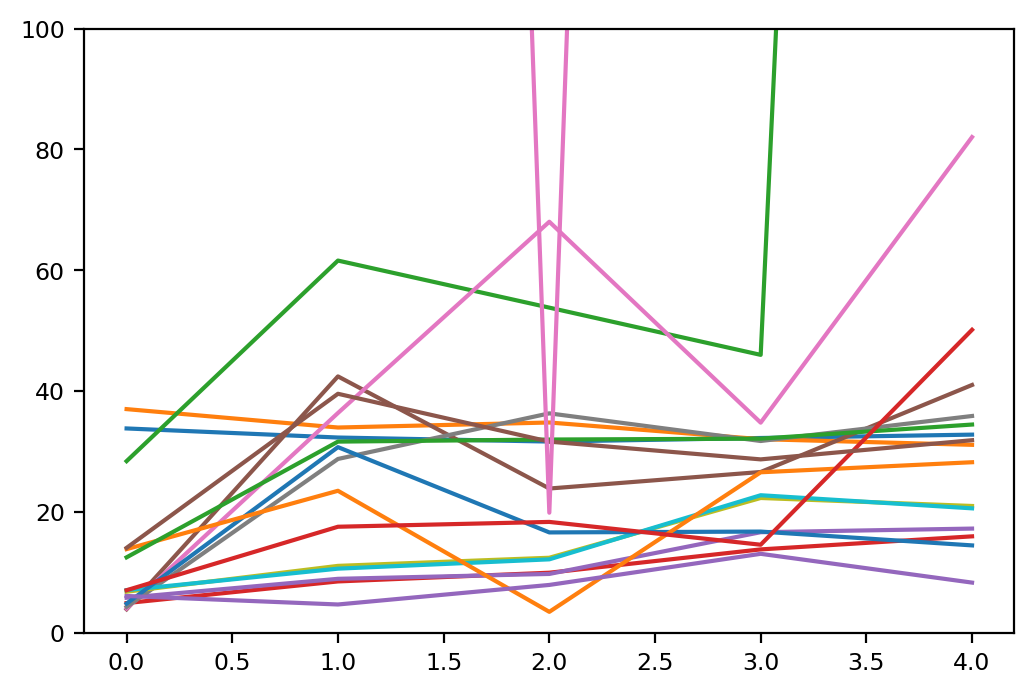

In [52]:
for i in results['asinis']:
    plt.plot(i)
    
plt.ylim(0,100)